In [1]:
from src.dataset import AnnCommentDataset,AnnDataSource

2022-06-25 13:51:48 DESKTOP-P91LQ96 numexpr.utils[16784] INFO NumExpr defaulting to 8 threads.


In [2]:
from src.learner import AnnLearner

In [3]:
datasource = AnnDataSource.init_datasource()

2022-06-25 13:52:11,334 INFO  src.dataset.ann_datasource:36 - Start convert file final_test.csv to dataset
2022-06-25 13:52:11,337 INFO  src.dataset.ann_datasource:36 - Start convert file final_train.csv to dataset
2022-06-25 13:52:11,694 INFO  src.dataset.ann_datasource:47 - {'negative': 0, 'neural': 1, 'positive': 2}
2022-06-25 13:52:11,694 INFO  src.dataset.ann_datasource:36 - Start convert file final_val.csv to dataset


In [4]:
ann_leaner = AnnLearner(mode='training',data_source=datasource,n_epochs=20,is_save_best_model=True,learning_rate=1e-4)

In [5]:
ann_leaner.fit()

2022-06-25 13:52:12,477 INFO  src.learner.AnnLearner:160 - Start Training


100%|██████████| 101/101 [00:09<00:00, 11.20it/s]

2022-06-25 13:52:21,511 INFO  src.learner.AnnLearner:165 - Start evaluate



100%|██████████| 12/12 [00:00<00:00, 115.68it/s]


2022-06-25 13:52:21,651 INFO  src.learner.AnnLearner:124 - Save model done
2022-06-25 13:52:21,656 INFO  src.learner.AnnLearner:173 - Epoch: 0 --- Training loss: 1.084641137925705 --- Train acc: 0.52084960174918 --- Val loss: 1.0847468674182892 --- Val acc: 0.5098314606741573Time: 9.178788900375366s
2022-06-25 13:52:21,658 INFO  src.learner.AnnLearner:177 - Start testing


100%|██████████| 13/13 [00:00<00:00, 71.28it/s]


2022-06-25 13:52:21,858 INFO  src.learner.AnnLearner:151 - Detail result for testing
+---------------------+--------------------+--------------------+
|      f1_score       |    recall_score    |   accuracy_score   |
+---------------------+--------------------+--------------------+
| 0.35820127598271245 | 0.5221238938053098 | 0.5221238938053098 |
+---------------------+--------------------+--------------------+
2022-06-25 13:52:21,859 INFO  src.learner.AnnLearner:160 - Start Training


100%|██████████| 101/101 [00:10<00:00,  9.65it/s]

2022-06-25 13:52:32,341 INFO  src.learner.AnnLearner:165 - Start evaluate



100%|██████████| 12/12 [00:00<00:00, 74.53it/s]

2022-06-25 13:52:32,512 INFO  src.learner.AnnLearner:173 - Epoch: 1 --- Training loss: 1.0748484347126273 --- Train acc: 0.52084960174918 --- Val loss: 1.048155814409256 --- Val acc: 0.5098314606741573Time: 10.652797937393188s
2022-06-25 13:52:32,514 INFO  src.learner.AnnLearner:177 - Start testing



100%|██████████| 13/13 [00:00<00:00, 85.68it/s]

2022-06-25 13:52:32,680 INFO  src.learner.AnnLearner:151 - Detail result for testing
+---------------------+--------------------+--------------------+
|      f1_score       |    recall_score    |   accuracy_score   |
+---------------------+--------------------+--------------------+
| 0.35820127598271245 | 0.5221238938053098 | 0.5221238938053098 |
+---------------------+--------------------+--------------------+
2022-06-25 13:52:32,681 INFO  src.learner.AnnLearner:160 - Start Training



100%|██████████| 101/101 [00:07<00:00, 12.63it/s]

2022-06-25 13:52:40,693 INFO  src.learner.AnnLearner:165 - Start evaluate



100%|██████████| 12/12 [00:00<00:00, 137.24it/s]

2022-06-25 13:52:40,785 INFO  src.learner.AnnLearner:173 - Epoch: 2 --- Training loss: 0.9797922077745495 --- Train acc: 0.5206934249570514 --- Val loss: 0.9268195877472559 --- Val acc: 0.5098314606741573Time: 8.103600978851318s
2022-06-25 13:52:40,786 INFO  src.learner.AnnLearner:177 - Start testing



100%|██████████| 13/13 [00:00<00:00, 116.52it/s]

2022-06-25 13:52:40,911 INFO  src.learner.AnnLearner:151 - Detail result for testing
+---------------------+--------------------+--------------------+
|      f1_score       |    recall_score    |   accuracy_score   |
+---------------------+--------------------+--------------------+
| 0.35820127598271245 | 0.5221238938053098 | 0.5221238938053098 |
+---------------------+--------------------+--------------------+
2022-06-25 13:52:40,912 INFO  src.learner.AnnLearner:160 - Start Training



100%|██████████| 101/101 [00:06<00:00, 15.52it/s]

2022-06-25 13:52:47,429 INFO  src.learner.AnnLearner:165 - Start evaluate



100%|██████████| 12/12 [00:00<00:00, 143.46it/s]

2022-06-25 13:52:47,546 INFO  src.learner.AnnLearner:124 - Save model done
2022-06-25 13:52:47,547 INFO  src.learner.AnnLearner:173 - Epoch: 3 --- Training loss: 0.8894214376364604 --- Train acc: 0.6842105263157895 --- Val loss: 0.8385757654905319 --- Val acc: 0.7289325842696629Time: 6.635216951370239s
2022-06-25 13:52:47,548 INFO  src.learner.AnnLearner:177 - Start testing



100%|██████████| 13/13 [00:00<00:00, 129.87it/s]

2022-06-25 13:52:47,660 INFO  src.learner.AnnLearner:151 - Detail result for testing
+--------------------+--------------------+--------------------+
|      f1_score      |    recall_score    |   accuracy_score   |
+--------------------+--------------------+--------------------+
| 0.6329173755974441 | 0.6927939317319848 | 0.6927939317319848 |
+--------------------+--------------------+--------------------+
2022-06-25 13:52:47,661 INFO  src.learner.AnnLearner:160 - Start Training



100%|██████████| 101/101 [00:07<00:00, 12.68it/s]

2022-06-25 13:52:55,639 INFO  src.learner.AnnLearner:165 - Start evaluate



100%|██████████| 12/12 [00:00<00:00, 98.45it/s]

2022-06-25 13:52:55,793 INFO  src.learner.AnnLearner:124 - Save model done
2022-06-25 13:52:55,794 INFO  src.learner.AnnLearner:173 - Epoch: 4 --- Training loss: 0.8056504903453412 --- Train acc: 0.7626112759643917 --- Val loss: 0.8367723872264227 --- Val acc: 0.7345505617977528Time: 8.133018016815186s
2022-06-25 13:52:55,795 INFO  src.learner.AnnLearner:177 - Start testing



100%|██████████| 13/13 [00:00<00:00, 94.71it/s]


2022-06-25 13:52:55,951 INFO  src.learner.AnnLearner:151 - Detail result for testing
+--------------------+--------------------+--------------------+
|      f1_score      |    recall_score    |   accuracy_score   |
+--------------------+--------------------+--------------------+
| 0.6353808366833016 | 0.6940581542351454 | 0.6940581542351454 |
+--------------------+--------------------+--------------------+
2022-06-25 13:52:55,953 INFO  src.learner.AnnLearner:160 - Start Training


100%|██████████| 101/101 [00:06<00:00, 15.03it/s]

2022-06-25 13:53:02,683 INFO  src.learner.AnnLearner:165 - Start evaluate



100%|██████████| 12/12 [00:00<00:00, 104.56it/s]

2022-06-25 13:53:02,804 INFO  src.learner.AnnLearner:173 - Epoch: 5 --- Training loss: 0.7776212591936092 --- Train acc: 0.7782289551772607 --- Val loss: 0.7952151646216711 --- Val acc: 0.7303370786516854Time: 6.8513829708099365s
2022-06-25 13:53:02,805 INFO  src.learner.AnnLearner:177 - Start testing



100%|██████████| 13/13 [00:00<00:00, 95.68it/s]

2022-06-25 13:53:02,955 INFO  src.learner.AnnLearner:151 - Detail result for testing
+-------------------+--------------------+--------------------+
|     f1_score      |    recall_score    |   accuracy_score   |
+-------------------+--------------------+--------------------+
| 0.628809607916744 | 0.6890012642225032 | 0.6890012642225032 |
+-------------------+--------------------+--------------------+
2022-06-25 13:53:02,956 INFO  src.learner.AnnLearner:160 - Start Training



100%|██████████| 101/101 [00:06<00:00, 15.66it/s]

2022-06-25 13:53:09,415 INFO  src.learner.AnnLearner:165 - Start evaluate



100%|██████████| 12/12 [00:00<00:00, 115.48it/s]

2022-06-25 13:53:09,554 INFO  src.learner.AnnLearner:124 - Save model done
2022-06-25 13:53:09,554 INFO  src.learner.AnnLearner:173 - Epoch: 6 --- Training loss: 0.773452630727598 --- Train acc: 0.7832266125253787 --- Val loss: 0.824373851219813 --- Val acc: 0.7387640449438202Time: 6.598581552505493s
2022-06-25 13:53:09,556 INFO  src.learner.AnnLearner:177 - Start testing



100%|██████████| 13/13 [00:00<00:00, 119.68it/s]

2022-06-25 13:53:09,677 INFO  src.learner.AnnLearner:151 - Detail result for testing
+--------------------+--------------------+--------------------+
|      f1_score      |    recall_score    |   accuracy_score   |
+--------------------+--------------------+--------------------+
| 0.6345403150342142 | 0.6940581542351454 | 0.6940581542351454 |
+--------------------+--------------------+--------------------+
2022-06-25 13:53:09,678 INFO  src.learner.AnnLearner:160 - Start Training



100%|██████████| 101/101 [00:07<00:00, 14.39it/s]

2022-06-25 13:53:16,709 INFO  src.learner.AnnLearner:165 - Start evaluate



100%|██████████| 12/12 [00:00<00:00, 85.32it/s]

2022-06-25 13:53:16,856 INFO  src.learner.AnnLearner:173 - Epoch: 7 --- Training loss: 0.7633273707758083 --- Train acc: 0.7907230985475558 --- Val loss: 0.8023453801870346 --- Val acc: 0.7275280898876404Time: 7.177802324295044s
2022-06-25 13:53:16,858 INFO  src.learner.AnnLearner:177 - Start testing



100%|██████████| 13/13 [00:00<00:00, 80.62it/s]

2022-06-25 13:53:17,035 INFO  src.learner.AnnLearner:151 - Detail result for testing


+--------------------+--------------------+--------------------+
|      f1_score      |    recall_score    |   accuracy_score   |
+--------------------+--------------------+--------------------+
| 0.6317527906801184 | 0.6915297092288243 | 0.6915297092288243 |
+--------------------+--------------------+--------------------+
2022-06-25 13:53:17,037 INFO  src.learner.AnnLearner:160 - Start Training


100%|██████████| 101/101 [00:07<00:00, 14.38it/s]


2022-06-25 13:53:24,071 INFO  src.learner.AnnLearner:165 - Start evaluate


100%|██████████| 12/12 [00:00<00:00, 120.16it/s]

2022-06-25 13:53:24,178 INFO  src.learner.AnnLearner:173 - Epoch: 8 --- Training loss: 0.7569978856804347 --- Train acc: 0.7915039825081993 --- Val loss: 0.81833183268706 --- Val acc: 0.726123595505618Time: 7.141008138656616s
2022-06-25 13:53:24,179 INFO  src.learner.AnnLearner:177 - Start testing



100%|██████████| 13/13 [00:00<00:00, 69.85it/s]

2022-06-25 13:53:24,381 INFO  src.learner.AnnLearner:151 - Detail result for testing
+--------------------+--------------------+--------------------+
|      f1_score      |    recall_score    |   accuracy_score   |
+--------------------+--------------------+--------------------+
| 0.6322848804610083 | 0.6915297092288243 | 0.6915297092288243 |
+--------------------+--------------------+--------------------+
2022-06-25 13:53:24,383 INFO  src.learner.AnnLearner:160 - Start Training



100%|██████████| 101/101 [00:08<00:00, 11.74it/s]

2022-06-25 13:53:32,998 INFO  src.learner.AnnLearner:165 - Start evaluate



100%|██████████| 12/12 [00:00<00:00, 101.14it/s]

2022-06-25 13:53:33,123 INFO  src.learner.AnnLearner:173 - Epoch: 9 --- Training loss: 0.7516107494288152 --- Train acc: 0.7955645791035452 --- Val loss: 0.8141629447539648 --- Val acc: 0.7176966292134831Time: 8.739634990692139s
2022-06-25 13:53:33,124 INFO  src.learner.AnnLearner:177 - Start testing



100%|██████████| 13/13 [00:00<00:00, 80.30it/s]

2022-06-25 13:53:33,299 INFO  src.learner.AnnLearner:151 - Detail result for testing


+--------------------+--------------------+--------------------+
|      f1_score      |    recall_score    |   accuracy_score   |
+--------------------+--------------------+--------------------+
| 0.6374275889019708 | 0.6940581542351454 | 0.6940581542351454 |
+--------------------+--------------------+--------------------+
2022-06-25 13:53:33,301 INFO  src.learner.AnnLearner:160 - Start Training


100%|██████████| 101/101 [00:06<00:00, 15.49it/s]

2022-06-25 13:53:39,831 INFO  src.learner.AnnLearner:165 - Start evaluate



100%|██████████| 12/12 [00:00<00:00, 146.84it/s]

2022-06-25 13:53:39,918 INFO  src.learner.AnnLearner:173 - Epoch: 10 --- Training loss: 0.7467670381659328 --- Train acc: 0.8010307668280493 --- Val loss: 0.8016801923513412 --- Val acc: 0.7162921348314607Time: 6.617607116699219s
2022-06-25 13:53:39,918 INFO  src.learner.AnnLearner:177 - Start testing



100%|██████████| 13/13 [00:00<00:00, 135.78it/s]

2022-06-25 13:53:40,026 INFO  src.learner.AnnLearner:151 - Detail result for testing
+--------------------+--------------------+--------------------+
|      f1_score      |    recall_score    |   accuracy_score   |
+--------------------+--------------------+--------------------+
| 0.6435434847520292 | 0.6940581542351454 | 0.6940581542351454 |
+--------------------+--------------------+--------------------+
2022-06-25 13:53:40,027 INFO  src.learner.AnnLearner:160 - Start Training



100%|██████████| 101/101 [00:05<00:00, 17.74it/s]

2022-06-25 13:53:45,733 INFO  src.learner.AnnLearner:165 - Start evaluate



100%|██████████| 12/12 [00:00<00:00, 133.36it/s]

2022-06-25 13:53:45,830 INFO  src.learner.AnnLearner:173 - Epoch: 11 --- Training loss: 0.741602915348393 --- Train acc: 0.8100890207715133 --- Val loss: 0.8248568127552668 --- Val acc: 0.7205056179775281Time: 5.803183317184448s
2022-06-25 13:53:45,831 INFO  src.learner.AnnLearner:177 - Start testing



100%|██████████| 13/13 [00:00<00:00, 114.05it/s]

2022-06-25 13:53:45,955 INFO  src.learner.AnnLearner:151 - Detail result for testing
+--------------------+--------------------+--------------------+
|      f1_score      |    recall_score    |   accuracy_score   |
+--------------------+--------------------+--------------------+
| 0.6430977444188622 | 0.6826801517067004 | 0.6826801517067004 |
+--------------------+--------------------+--------------------+
2022-06-25 13:53:45,956 INFO  src.learner.AnnLearner:160 - Start Training



100%|██████████| 101/101 [00:07<00:00, 13.50it/s]

2022-06-25 13:53:53,447 INFO  src.learner.AnnLearner:165 - Start evaluate



100%|██████████| 12/12 [00:00<00:00, 84.46it/s]

2022-06-25 13:53:53,595 INFO  src.learner.AnnLearner:173 - Epoch: 12 --- Training loss: 0.7352529663850765 --- Train acc: 0.8150866781196314 --- Val loss: 0.8180042207241058 --- Val acc: 0.7120786516853933Time: 7.6387038230896s
2022-06-25 13:53:53,597 INFO  src.learner.AnnLearner:177 - Start testing



100%|██████████| 13/13 [00:00<00:00, 91.53it/s]

2022-06-25 13:53:53,752 INFO  src.learner.AnnLearner:151 - Detail result for testing
+--------------------+--------------------+--------------------+
|      f1_score      |    recall_score    |   accuracy_score   |
+--------------------+--------------------+--------------------+
| 0.6459259639676067 | 0.6738305941845765 | 0.6738305941845765 |
+--------------------+--------------------+--------------------+
2022-06-25 13:53:53,753 INFO  src.learner.AnnLearner:160 - Start Training



100%|██████████| 101/101 [00:05<00:00, 17.59it/s]

2022-06-25 13:53:59,501 INFO  src.learner.AnnLearner:165 - Start evaluate



100%|██████████| 12/12 [00:00<00:00, 127.30it/s]

2022-06-25 13:53:59,600 INFO  src.learner.AnnLearner:173 - Epoch: 13 --- Training loss: 0.7293515742415249 --- Train acc: 0.8269561143214118 --- Val loss: 0.8171737293402354 --- Val acc: 0.7050561797752809Time: 5.847629070281982s
2022-06-25 13:53:59,601 INFO  src.learner.AnnLearner:177 - Start testing



100%|██████████| 13/13 [00:00<00:00, 151.57it/s]

2022-06-25 13:53:59,696 INFO  src.learner.AnnLearner:151 - Detail result for testing
+--------------------+--------------------+--------------------+
|      f1_score      |    recall_score    |   accuracy_score   |
+--------------------+--------------------+--------------------+
| 0.6456934200742516 | 0.6637168141592921 | 0.6637168141592921 |
+--------------------+--------------------+--------------------+
2022-06-25 13:53:59,697 INFO  src.learner.AnnLearner:160 - Start Training



100%|██████████| 101/101 [00:06<00:00, 16.36it/s]

2022-06-25 13:54:05,883 INFO  src.learner.AnnLearner:165 - Start evaluate



100%|██████████| 12/12 [00:00<00:00, 78.34it/s]

2022-06-25 13:54:06,045 INFO  src.learner.AnnLearner:173 - Epoch: 14 --- Training loss: 0.7196122189559558 --- Train acc: 0.8361705450570045 --- Val loss: 0.838830421368281 --- Val acc: 0.7106741573033708Time: 6.347661018371582s
2022-06-25 13:54:06,046 INFO  src.learner.AnnLearner:177 - Start testing



100%|██████████| 13/13 [00:00<00:00, 112.28it/s]

2022-06-25 13:54:06,175 INFO  src.learner.AnnLearner:151 - Detail result for testing


+--------------------+--------------------+--------------------+
|      f1_score      |    recall_score    |   accuracy_score   |
+--------------------+--------------------+--------------------+
| 0.6502956480929365 | 0.6586599241466498 | 0.6586599241466498 |
+--------------------+--------------------+--------------------+
2022-06-25 13:54:06,177 INFO  src.learner.AnnLearner:160 - Start Training


100%|██████████| 101/101 [00:06<00:00, 14.93it/s]

2022-06-25 13:54:12,953 INFO  src.learner.AnnLearner:165 - Start evaluate



100%|██████████| 12/12 [00:00<00:00, 112.22it/s]

2022-06-25 13:54:13,067 INFO  src.learner.AnnLearner:173 - Epoch: 15 --- Training loss: 0.7127545723820677 --- Train acc: 0.8467905669217555 --- Val loss: 0.8351247807343801 --- Val acc: 0.7078651685393258Time: 6.890228986740112s
2022-06-25 13:54:13,068 INFO  src.learner.AnnLearner:177 - Start testing



100%|██████████| 13/13 [00:00<00:00, 93.74it/s]

2022-06-25 13:54:13,221 INFO  src.learner.AnnLearner:151 - Detail result for testing
+--------------------+--------------------+--------------------+
|      f1_score      |    recall_score    |   accuracy_score   |
+--------------------+--------------------+--------------------+
| 0.6389313663292632 | 0.6536030341340076 | 0.6536030341340076 |
+--------------------+--------------------+--------------------+
2022-06-25 13:54:13,222 INFO  src.learner.AnnLearner:160 - Start Training



100%|██████████| 101/101 [00:06<00:00, 14.91it/s]

2022-06-25 13:54:20,009 INFO  src.learner.AnnLearner:165 - Start evaluate



100%|██████████| 12/12 [00:00<00:00, 92.68it/s]

2022-06-25 13:54:20,146 INFO  src.learner.AnnLearner:173 - Epoch: 16 --- Training loss: 0.7059288727174892 --- Train acc: 0.8560049976573482 --- Val loss: 0.8331224073966345 --- Val acc: 0.7036516853932584Time: 6.92434024810791s
2022-06-25 13:54:20,147 INFO  src.learner.AnnLearner:177 - Start testing



100%|██████████| 13/13 [00:00<00:00, 108.27it/s]

2022-06-25 13:54:20,282 INFO  src.learner.AnnLearner:151 - Detail result for testing
+--------------------+--------------------+--------------------+
|      f1_score      |    recall_score    |   accuracy_score   |
+--------------------+--------------------+--------------------+
| 0.6503145961901177 | 0.6586599241466498 | 0.6586599241466498 |
+--------------------+--------------------+--------------------+
2022-06-25 13:54:20,283 INFO  src.learner.AnnLearner:160 - Start Training



100%|██████████| 101/101 [00:06<00:00, 15.20it/s]

2022-06-25 13:54:26,939 INFO  src.learner.AnnLearner:165 - Start evaluate



100%|██████████| 12/12 [00:00<00:00, 89.32it/s]

2022-06-25 13:54:27,080 INFO  src.learner.AnnLearner:173 - Epoch: 17 --- Training loss: 0.6945463165198222 --- Train acc: 0.8625644229267531 --- Val loss: 0.8592354456583658 --- Val acc: 0.6924157303370787Time: 6.797698974609375s
2022-06-25 13:54:27,082 INFO  src.learner.AnnLearner:177 - Start testing



100%|██████████| 13/13 [00:00<00:00, 105.00it/s]

2022-06-25 13:54:27,216 INFO  src.learner.AnnLearner:151 - Detail result for testing
+--------------------+--------------------+--------------------+
|      f1_score      |    recall_score    |   accuracy_score   |
+--------------------+--------------------+--------------------+
| 0.6451178966888536 | 0.6523388116308471 | 0.6523388116308471 |
+--------------------+--------------------+--------------------+
2022-06-25 13:54:27,218 INFO  src.learner.AnnLearner:160 - Start Training



100%|██████████| 101/101 [00:06<00:00, 15.86it/s]

2022-06-25 13:54:33,598 INFO  src.learner.AnnLearner:165 - Start evaluate



100%|██████████| 12/12 [00:00<00:00, 54.00it/s]

2022-06-25 13:54:33,825 INFO  src.learner.AnnLearner:173 - Epoch: 18 --- Training loss: 0.6873581385848546 --- Train acc: 0.8719350304544745 --- Val loss: 0.8557426581780115 --- Val acc: 0.6896067415730337Time: 6.607182741165161s
2022-06-25 13:54:33,826 INFO  src.learner.AnnLearner:177 - Start testing



100%|██████████| 13/13 [00:00<00:00, 110.30it/s]

2022-06-25 13:54:33,955 INFO  src.learner.AnnLearner:151 - Detail result for testing


+--------------------+--------------------+--------------------+
|      f1_score      |    recall_score    |   accuracy_score   |
+--------------------+--------------------+--------------------+
| 0.6429756718404949 | 0.6523388116308471 | 0.6523388116308471 |
+--------------------+--------------------+--------------------+
2022-06-25 13:54:33,958 INFO  src.learner.AnnLearner:160 - Start Training


100%|██████████| 101/101 [00:10<00:00,  9.71it/s]

2022-06-25 13:54:44,380 INFO  src.learner.AnnLearner:165 - Start evaluate



100%|██████████| 12/12 [00:00<00:00, 42.62it/s]

2022-06-25 13:54:44,670 INFO  src.learner.AnnLearner:173 - Epoch: 19 --- Training loss: 0.6829873099185453 --- Train acc: 0.8795876932687803 --- Val loss: 0.8601717005173365 --- Val acc: 0.6853932584269663Time: 10.713154792785645s
2022-06-25 13:54:44,671 INFO  src.learner.AnnLearner:177 - Start testing



100%|██████████| 13/13 [00:00<00:00, 70.53it/s]


2022-06-25 13:54:44,873 INFO  src.learner.AnnLearner:151 - Detail result for testing
+--------------------+--------------------+--------------------+
|      f1_score      |    recall_score    |   accuracy_score   |
+--------------------+--------------------+--------------------+
| 0.6357740348706667 | 0.6472819216182049 | 0.6472819216182049 |
+--------------------+--------------------+--------------------+


In [6]:
import pickle
with open(f'assets/report/ann_report.pk', 'rb') as fin:
    ann_report = pickle.load(fin)

In [7]:
import matplotlib.pyplot as plt

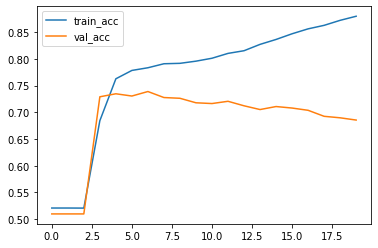

In [8]:
title = []
for key in ann_report:
    if 'acc' in key:
        plt.plot(ann_report[key])
        title.append(key)
plt.legend(title)
plt.show()

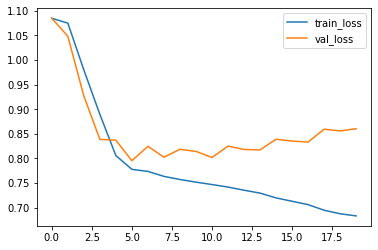

In [9]:
title = []
for key in ann_report:
    if 'acc' not in key:
        plt.plot(ann_report[key])
        title.append(key)
plt.legend(title)
plt.show()